In [80]:
import pandas as pd
import numpy as np
import seaborn as sns

C:\Users\computer world\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [99]:
#importing data
artist = pd.read_csv("downloads/collection-master/collection/artists.csv")
artworks = pd.read_csv("downloads/collection-master/collection/artworks.csv")

In [100]:
artist

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15238,135018,Abdoulaye Konaté,"Malian, born 1953",Malian,NaN,1953,0,NaN,NaN
15239,135032,Yolanda Lopez,"American, 1942 – 2021",American,Female,1942,2021,NaN,NaN
15240,135042,Arnt Jensen,"Danish, born 1971",Danish,Male,1971,0,NaN,NaN
15241,135111,After Sophie Taeuber-Arp,"French, born Switzerland. 1889–1943",NaN,NaN,0,0,NaN,NaN


In [77]:
#checking null values
artist.isna().sum()

ConstituentID        0
DisplayName          0
ArtistBio         2215
Nationality       2472
Gender            3165
BeginDate            0
EndDate              0
Wiki QID         11994
ULAN             12311
dtype: int64

In [78]:
artist['Wiki QID'].value_counts()

Q1994938     2
Q230673      2
Q5323238     2
Q1524052     2
Q3027988     2
            ..
Q324258      1
Q464686      1
Q1036501     1
Q3731761     1
Q28595217    1
Name: Wiki QID, Length: 3244, dtype: int64

In [ ]:
#dropping columns cause they contain large number of Null values
drop_columns = ['Wiki QID','ULAN']

### working on some inconsistencies in data 

In [81]:
artist.columns

Index(['ConstituentID', 'DisplayName', 'ArtistBio', 'Nationality', 'Gender',
       'BeginDate', 'EndDate', 'Wiki QID', 'ULAN'],
      dtype='object')

In [83]:
artist['Gender'].unique()

array(['Male', 'Female', nan, 'Non-Binary', 'male', 'female',
       'Non-binary'], dtype=object)

In [101]:
#setting column to lower case to remove inconsistency
artist['Gender'] = artist['Gender'].apply(lambda x: str(x).lower())

In [86]:
artist['Gender'].unique()

array(['male', 'female', 'nan', 'non-binary'], dtype=object)

In [102]:
#making nan values floating point
artist['Gender'].replace('nan',np.nan, inplace=True)

In [88]:
artist['Gender'].isna().sum()

3165

In [89]:
artist['BeginDate'].unique()

array([1930, 1936, 1941, 1946, 1925, 1923, 1918, 1886, 1911, 1907, 1900,
          0, 1926, 1863, 1927, 1867, 1940, 1885, 1898, 1894, 1932, 1921,
       1883, 1888, 1913, 1937, 1934, 1933, 1935, 1928, 1920, 1915, 1904,
       1818, 1902, 1864, 1948, 1897, 1950, 1912, 1916, 1895, 1910, 1896,
       1945, 1827, 1922, 1901, 1908, 1906, 1942, 1939, 1887, 1899, 1943,
       1917, 1890, 1964, 1929, 1914, 1924, 1814, 1953, 1858, 1868, 1919,
       1891, 1903, 1813, 1938, 1880, 1957, 1955, 1931, 1829, 1909, 1835,
       1893, 1857, 1799, 1873, 1811, 1875, 1892, 1951, 1952, 1944, 1956,
       1947, 1866, 1889, 1871, 1825, 1870, 1819, 1854, 1954, 1960, 1905,
       1801, 1879, 1872, 1884, 1816, 1848, 1830, 1882, 1949, 1959, 1843,
       1881, 1808, 1860, 1849, 1958, 1753, 1824, 1826, 1876, 1831, 1865,
       1859, 1861, 1834, 1851, 1823, 1812, 1822, 1869, 1874, 1847, 1833,
       1856, 1815, 1962, 1810, 1877, 1844, 1972, 1839, 1836, 1796, 1961,
       1792, 1837, 1878, 1817, 1862, 1798, 1821, 18

In [92]:
artist['EndDate'].unique()

array([1992,    0, 1966, 1995, 1997, 1964, 2013, 1942, 1941, 1940, 2000,
       1976, 1949, 2008, 2017, 1973, 1953, 1991, 1971, 2010, 2011, 2007,
       1994, 1967, 1881, 1984, 2002, 1951, 1988, 1987, 1978, 1993, 1894,
       1999, 1975, 1996, 1969, 2012, 1983, 2020, 1989, 1959, 2003, 1936,
       2006, 1961, 1998, 1980, 1982, 1877, 2021, 1956, 1879, 1946, 1887,
       2018, 1985, 2005, 1912, 1927, 1952, 1871, 1931, 1960, 1948, 2009,
       2004, 1965, 1955, 2001, 2022, 1981, 1990, 1924, 1986, 1968, 1882,
       1958, 2014, 2016, 1972, 1944, 1905, 1938, 1902, 1934, 1979, 1963,
       2015, 1962, 1954, 1898, 1903, 1950, 1922, 1893, 1910, 1925, 1908,
       1957, 1900, 1909, 1977, 1828, 1933, 1870, 1876, 1896, 1916, 1930,
       1970, 1885, 1947, 1943, 1929, 1919, 1937, 1945, 1939, 1890, 1906,
       1926, 1856, 1932, 2019, 1863, 1974, 1875, 1913, 1892, 1878, 1928,
       1901, 1920, 1917, 1935, 1886, 1889, 1883, 1904, 1918, 1921, 1899,
       1869, 1915, 1914, 1855, 1865, 1911, 1907, 18

In [98]:
artist['DisplayName'].unique()[40:70]

array(['Raimund Abraham', 'Ivor Abrahams', 'Gerald Abramovitz',
       'William Ross Abrams', 'Rodolfo Abularach', 'Vito Acconci',
       'Milton Ackoff', 'Norman Ackroyd', 'Luis Alberto Acuña',
       'Henri Georges Adam', 'Antoine Samuel Adam-Salomon',
       'Valerio Adami', 'Ansel Adams', 'Alice Adams', 'Clinton Adams',
       'Dacres Adams', 'Dennis Adams', 'Kenneth M. Adams', 'Robert Adams',
       'Shelby Lee Adams', 'Charles Addams', 'Allan Adler',
       'Jankel Adler', 'Virginia Admiral', 'Pic Adrian', 'Roy Adzak',
       'Nicholas Africano', 'Afro (Afro Basaldella)', 'Aftograf',
       'Agam (Yaacov Agam)'], dtype=object)

In [199]:
split_const = '–'
artist['ArtistBio'][0].split()[1].split(split_const)

['1930', '1992']

In [210]:
artist['ArtistBio'].notna()==True

0        True
1        True
2        True
3        True
4        True
         ... 
15238    True
15239    True
15240    True
15241    True
15242    True
Name: ArtistBio, Length: 15243, dtype: bool

In [211]:
artist[artist['ArtistBio'].notna()==True]

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,male,1941,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15238,135018,Abdoulaye Konaté,"Malian, born 1953",Malian,NaN,1953,0,NaN,NaN
15239,135032,Yolanda Lopez,"American, 1942 – 2021",American,female,1942,2021,NaN,NaN
15240,135042,Arnt Jensen,"Danish, born 1971",Danish,male,1971,0,NaN,NaN
15241,135111,After Sophie Taeuber-Arp,"French, born Switzerland. 1889–1943",NaN,NaN,0,0,NaN,NaN


In [217]:
artist.loc[(artist['Nationality'].isna()==True) & (artist['ArtistBio'].notna()==True),:]

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
90,101,Album-miscellaneous,Various,NaN,NaN,0,0,NaN,NaN
2110,2377,Gruppo N,"active 1959–1964 in Padua, Italy",NaN,NaN,1959,1964,NaN,NaN
2302,2589,"J.A. Henckels, Solingen, Germany",est. 1731,NaN,NaN,1731,0,NaN,NaN
2685,3014,Eiichiro Katayama,Nationality unknown,NaN,NaN,0,0,NaN,NaN
2919,3280,Rainer Kuchenmeister,born 1926,NaN,male,1926,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15167,133650,G. Peter Jemison,Enrolled member of the Seneca Nation of Indian...,NaN,male,1945,0,NaN,NaN
15175,133813,The NetHack DevTeam,est. 1987,NaN,NaN,1987,0,NaN,NaN
15214,134432,New Red Order,formation c. 2016–ongoing,NaN,NaN,2016,0,NaN,NaN
15234,134851,"Magnavox, USA",est. 1917,NaN,NaN,1917,0,NaN,NaN


In [218]:
artist_ = artist.copy()

In [219]:
artist_.isna().sum()

ConstituentID        0
DisplayName          0
ArtistBio         2215
Nationality       2472
Gender            3165
BeginDate            0
EndDate              0
Wiki QID         11994
ULAN             12311
dtype: int64

In [220]:
artist_.drop(columns=['Wiki QID','ULAN'],inplace=True)

In [239]:
artist_

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate
0,1,Robert Arneson,"American, 1930–1992",American,male,1930,1992
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,male,1936,0
2,3,Bill Arnold,"American, born 1941",American,male,1941,0
3,4,Charles Arnoldi,"American, born 1946",American,male,1946,0
4,5,Per Arnoldi,"Danish, born 1941",Danish,male,1941,0
...,...,...,...,...,...,...,...
15238,135018,Abdoulaye Konaté,"Malian, born 1953",Malian,NaN,1953,0
15239,135032,Yolanda Lopez,"American, 1942 – 2021",American,female,1942,2021
15240,135042,Arnt Jensen,"Danish, born 1971",Danish,male,1971,0
15241,135111,After Sophie Taeuber-Arp,"French, born Switzerland. 1889–1943",NaN,NaN,0,0


In [248]:
any(artist_[['ArtistBio','Nationality','Gender']].isna())

True

In [250]:
artist_[artist_['ArtistBio'].isna()]

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate
14,18,Artko,NaN,NaN,NaN,0,0
173,201,Aoki Toshio,NaN,NaN,NaN,0,0
382,437,"Beggarstaffs (James Pryde, Scottish 1866-1941 ...",NaN,British,NaN,1866,1949
462,525,Palme Berthold,NaN,NaN,NaN,0,0
975,1102,Chikuchi Toshio,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...
15189,133910,"Van Cleave, Axtell, KS",NaN,NaN,NaN,0,0
15204,134134,Malik Edwards,NaN,American,male,0,0
15209,134233,Bob Clark,NaN,American,male,0,0
15228,134716,Agosto Machado,NaN,NaN,NaN,0,0


In [252]:
artist_.isna().sum()

ConstituentID       0
DisplayName         0
ArtistBio        2215
Nationality      2472
Gender           3165
BeginDate           0
EndDate             0
dtype: int64

In [267]:
artist_

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate
0,1,Robert Arneson,"American, 1930–1992",American,male,1930,1992
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,male,1936,0
2,3,Bill Arnold,"American, born 1941",American,male,1941,0
3,4,Charles Arnoldi,"American, born 1946",American,male,1946,0
4,5,Per Arnoldi,"Danish, born 1941",Danish,male,1941,0
...,...,...,...,...,...,...,...
15238,135018,Abdoulaye Konaté,"Malian, born 1953",Malian,NaN,1953,0
15239,135032,Yolanda Lopez,"American, 1942 – 2021",American,female,1942,2021
15240,135042,Arnt Jensen,"Danish, born 1971",Danish,male,1971,0
15241,135111,After Sophie Taeuber-Arp,"French, born Switzerland. 1889–1943",NaN,NaN,0,0


In [266]:
#dropping rows where null values exist for following columns
artist1 = artist_.drop(index=artist_[artist_['ArtistBio'].isna()].index,axis=0)
artist2 = artist1.drop(index=artist1[artist1['Nationality'].isna()].index,axis=0)
artist3 = artist2.drop(index=artist2[artist2['Gender'].isna()].index,axis=0)
artist3

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate
0,1,Robert Arneson,"American, 1930–1992",American,male,1930,1992
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,male,1936,0
2,3,Bill Arnold,"American, born 1941",American,male,1941,0
3,4,Charles Arnoldi,"American, born 1946",American,male,1946,0
4,5,Per Arnoldi,"Danish, born 1941",Danish,male,1941,0
...,...,...,...,...,...,...,...
15236,134919,William Downey,"British, 1829–1915",British,male,1829,1915
15237,134920,Daniel Downey,"British, 1831–1881",British,male,1831,1881
15239,135032,Yolanda Lopez,"American, 1942 – 2021",American,female,1942,2021
15240,135042,Arnt Jensen,"Danish, born 1971",Danish,male,1971,0


### Dealing with inconsistency in Begin and Enddate column

In [378]:
artist_df = artist3.copy()

In [381]:
artistdf = artist_df.copy()
artistdf['EndDate'] = artist_df['EndDate'].replace(0,2023)

In [301]:
artist_df[(artist_df['BeginDate']==0) & (artist_df['EndDate']!=2023)]

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate
17,22,Isidora Aschheim,Israeli,Israeli,female,0,0
47,55,Norman Ackroyd,British,British,male,0,0
87,98,Beatrice Albert,American,American,female,0,0
97,111,Carlo Alfano,Italian,Italian,male,0,0
120,139,Kunihiro Amano,Japanese,Japanese,male,0,0
...,...,...,...,...,...,...,...
15013,132166,Maartje Dros,Dutch,Dutch,female,0,0
15100,133293,Éric van Hove,"Belgian, born Algeria. 1975",Belgian,male,0,0
15127,133414,Kristian Hoffman,American,American,male,0,0
15149,133526,Yan Hu,Chinese,Chinese,female,0,0


In [382]:
artistdf['Age'] = artistdf['EndDate'] - artistdf['BeginDate']
artistdf['Age']

0        62
1        87
2        82
3        77
4        82
         ..
15236    86
15237    50
15239    79
15240    52
15242    93
Name: Age, Length: 11420, dtype: int64

In [347]:
artist_df[artist_df['Age']>107]

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Age
935,1051,Emilio Cerri,"Italian, died 1947",Italian,male,0,1947,1947
3434,3844,Leni Matthaei,"German, 1873–1981",German,female,1873,1981,108
4269,4772,Achille Quinet,"French, died 1900",French,male,0,1900,1900
5091,5694,Gerda Strömberg,"Swedish, died 1960",Swedish,female,0,1960,1960
5294,5918,Karl Trabert,"German, died 1968",German,male,0,1968,1968
5412,6052,Aida Vaisman,"Argentine, died 1940",Argentine,female,0,1940,1940
5762,6443,D. B. Woodbury,"American, died 1866",American,male,0,1866,1866
6019,6720,Jeanne Granès,"French, died 1923",French,female,0,1923,1923
6169,6876,Egill Jacobsen,"Danish, died 1998",Danish,male,0,1998,1998
6815,7699,Paul Jeuffrain,"French, died 1916",French,male,0,1916,1916


### binning age category 

In [383]:
artistdf['Age_Category'] = 0

artistdf.loc[artistdf['Age']<=0,'Age_Category'] = 'Not Enough Info'
artistdf.loc[(artistdf['Age']>0) & (artistdf['Age']<18),'Age_Category'] = 'Children'
artistdf.loc[(artistdf['Age']>=18) & (artistdf['Age']<40),'Age_Category'] = 'Young Adults'
artistdf.loc[(artistdf['Age']>=40) & (artistdf['Age']<60),'Age_Category'] = 'Adults'
artistdf.loc[(artistdf['Age']>=60) & (artistdf['Age']<=108),'Age_Category'] = 'Aged'
artistdf.loc[artistdf['Age']>108,'Age_Category'] = 'Not Enough Info'

In [384]:
artistdf['Age_Category'].value_counts()

Aged               8034
Adults             2156
Not Enough Info     982
Young Adults        244
Children              4
Name: Age_Category, dtype: int64

<AxesSubplot:xlabel='Age_Category', ylabel='count'>

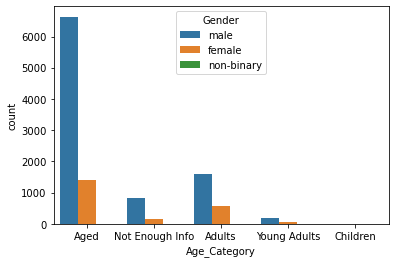

In [385]:
sns.countplot(x=artistdf['Age_Category'],hue=artistdf.Gender)

In [376]:
artist_df['Nationality'].value_counts()

American     4696
German        862
British       766
French        762
Italian       463
             ... 
Ethiopian       1
Cambodian       1
Ivorian         1
Cypriot         1
Bahamian        1
Name: Nationality, Length: 113, dtype: int64

### checking age category by nationality

In [386]:
artistdf.groupby('Nationality')['Age_Category'].value_counts()['American']

Age_Category
Aged               3524
Adults              774
Not Enough Info     304
Young Adults         92
Children              2
Name: Age_Category, dtype: int64

In [39]:
artworks

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjUyNzc3MCJd...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjUyNzM3NCJd...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjUyNzM3NSJd...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjUyNzQ3NCJd...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjUyNzQ3NSJd...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140843,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954-55,Page from a spiral-bound sketchbook with penci...,...,NaN,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN
140844,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954-55,Page from a spiral-bound sketchbook with penci...,...,NaN,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN
140845,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954-55,Page from a spiral-bound sketchbook with penci...,...,NaN,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN
140846,"Front cover of Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954-55,"Spiral-bound sketchbook with pencil, ballpoint...",...,NaN,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN


In [410]:
print(len(artist.DisplayName.unique()))
print(len(artworks.Artist.unique()))

15189
13697


### attempt to use fuzzy wuzzy process to fix data inconsistency 

In [406]:
from fuzzywuzzy import fuzz, process

def replace_txt_fuzzy(check_str, col, df):
    """
    function to detect words similar to check_str in the column data using fuzzy process.
    replace check_str with the most similar word
    """
    unique_features = df[col].unique().tolist()
    for check in check_str:
#         if check not in unique_features:
# #             unique_features.remove(check_str)

        closest_match = process.extractOne(check, unique_features)[0]
    #df[col] = df[col].replace(check_str, closest_match)
        print(check, ':', closest_match)

In [403]:
name_list = artist_df[artist_df['BeginDate']==0]['DisplayName'].values.tolist()

In [399]:
artworks[artworks['Artist']=='Danilo Aroldi, Corrado Aroldi']

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
2933,Periscopio Adjustable Table Lamp,"Danilo Aroldi, Corrado Aroldi","6, 7164","(Italian, born 1925) (Italian, born 1936)",(Italian) (Italian),(1925) (1936),(0) (0),(Male) (Male),1968,Lacquered metal and rubber,...,http://www.moma.org/media/W1siZiIsIjIyOTY5NSJd...,NaN,NaN,NaN,46.9901,NaN,NaN,10.16,NaN,NaN


In [407]:
replace_txt_fuzzy(name_list,'Artist',artworks)

Isidora Aschheim : Isidora Aschheim
Norman Ackroyd : Norman Ackroyd
Beatrice Albert : Beatrice Albert
Carlo Alfano : Carlo Alfano
Kunihiro Amano : Kunihiro Amano
Ralph Ammirati : L.M. Ericsson Telephone Company, Sweden, Hugo Blomberg, Ralph Lysell, Hans Gösta Thames
Bruce Angrave : Bruce Angrave
Leon Appelbaum : Leon Appelbaum
Tamotsu Arikawa : Tamotsu Arikawa
Alda Maria Armagni : Alda Maria Armagni
Irving Austin : Irving Austin
Mordechai Avniel : Mordechai Avniel
Bacard Fils : Bacard Fils
Carl Baker : Michael Engelmann, Carl Baker
Cyril H. Barnes : Cyril H. Barnes
Steve Barraclough : Steve Barraclough
Harry W. Batz, Jr. : Harry W. Batz, Jr.
Glen Baxter : Glen Baxter
Leslie Beaton : Leslie Beaton
David Ben Shaul : David Ben Shaul
Anthony Benjamin : Anthony Benjamin
M. Berthaud : M. Berthaud
Emilio Bertonati : Emilio Bertonati
William Betsch : William Betsch
Art Bevacqua : Art Bevacqua
Carl Bianga : Carl Bianga


KeyboardInterrupt: 

In [417]:
artworks['Date'] = artworks['Date'].apply(lambda x:str(x).lower()) 
artworks['Date'].unique()[:30]

array(['1896', '1987', '1903', '1980', '1976-77', '1968', '1900', '1978',
       '1905', '1906', '1979', '1980-81', '1918', '1970', '1975', '1984',
       '1986', '1974', 'n.d.', 'c. 1917', '1917', '1923', 'unknown',
       '1930', '1936', '1935', '1937', '1938', '1977', '1958'],
      dtype=object)

In [418]:
months = ['january','february','march','april','june','july','august','september','october','november','december']

In [423]:
x = artworks['Date'].where(artworks['Date']!=any(months),0)

In [430]:
artworks['Date']

0            1896
1            1987
2            1903
3            1980
4            1903
           ...   
140843    1954-55
140844    1954-55
140845    1954-55
140846    1954-55
140847    1954-55
Name: Date, Length: 140848, dtype: object

### working on date inconsistency 

In [522]:
def clean_and_parse_date(date_str):
    if pd.isnull(date_str) or date_str == 'nan':
        return np.nan

    # Remove parentheses and extra spaces
    date_str = date_str.replace('(', '').replace(')', '').strip()

    # Check for specific patterns and extract the relevant information
  
    # Handle month names
    date_str = date_str.replace('published', '').replace('executed', '').strip()
    date_str = date_str.replace('january', '01')
    date_str = date_str.replace('february', '02')
    date_str = date_str.replace('march', '03')
    date_str = date_str.replace('april', '04')
    date_str = date_str.replace('may', '05')
    date_str = date_str.replace('june', '06')
    date_str = date_str.replace('july', '07')
    date_str = date_str.replace('august', '08')
    date_str = date_str.replace('september', '09')
    date_str = date_str.replace('october', '10')
    date_str = date_str.replace('november', '11')
    date_st = date_str.replace('december', '12')
    date_st = date_st.replace('[^0-9]', '-',regex=True)

In [531]:
artworks_ = artworks.copy()
artworks_['Date'] = artworks_['Date'].str.replace('(', '').str.replace(')', '')
artworks_['Date'] = artworks_['Date'].str.replace('published', '').str.replace('executed', '')
artworks_['Date'] = artworks_['Date'].str.replace('january', '01')
artworks_['Date'] = artworks_['Date'].str.replace('february', '02')
artworks_['Date'] = artworks_['Date'].str.replace('march', '03')
artworks_['Date'] = artworks_['Date'].str.replace('april', '04')
artworks_['Date'] = artworks_['Date'].str.replace('may', '05')
artworks_['Date'] = artworks_['Date'].str.replace('june', '06')
artworks_['Date'] = artworks_['Date'].str.replace('july', '07')
artworks_['Date'] = artworks_['Date'].str.replace('august', '08')
artworks_['Date'] = artworks_['Date'].str.replace('september', '09')
artworks_['Date'] = artworks_['Date'].str.replace('october', '10')
artworks_['Date'] = artworks_['Date'].str.replace('november', '11')
artworks_['Date'] = artworks_['Date'].str.replace('december', '12')

C:\Users\computer world\AppData\Local\Temp\ipykernel_9672\2608191596.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  artworks_['Date'] = artworks_['Date'].str.replace('(', '').str.replace(')', '')


In [528]:
artworks_['Date'].value_counts()

nan                 2105
1967                1955
1966                1921
1971                1846
1965                1749
                    ... 
11 14-12 1, 1968       1
11 8-26, 1968          1
printed 1910           1
11 5-21, 1968          1
08 10-21, 1967         1
Name: Date, Length: 8766, dtype: int64

In [529]:
artworks_['Date'] = artworks_['Date'].replace('[^0-9]', '-',regex=True)

In [530]:
artworks_['Date'].value_counts()

---                     2113
1967                    1955
1966                    1921
1971                    1846
1965                    1749
                        ... 
11-11-20--1968             1
1907--1908                 1
04-9-----08-10--1971       1
04-9-----08-31--1971       1
01-8-15--1962              1
Name: Date, Length: 8152, dtype: int64

In [551]:
artworks_

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),date_column
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN,1903-03-01
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN,1903-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140843,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954-55,Page from a spiral-bound sketchbook with penci...,...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,NaN
140844,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954-55,Page from a spiral-bound sketchbook with penci...,...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,NaN
140845,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954-55,Page from a spiral-bound sketchbook with penci...,...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,NaN
140846,"Front cover of Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954-55,"Spiral-bound sketchbook with pencil, ballpoint...",...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,NaN


In [555]:
artworks_.DateAcquired

0         1996-04-09
1         1995-01-17
2         1997-01-15
3         1995-01-17
4         1997-01-15
             ...    
140843    2020-12-09
140844    2020-12-09
140845    2020-12-09
140846    2020-12-09
140847    2020-12-09
Name: DateAcquired, Length: 140848, dtype: object

In [558]:
artworks['Title'].unique()

array(['Ferdinandsbrücke Project, Vienna, Austria (Elevation, preliminary version)',
       'City of Music, National Superior Conservatory of Music and Dance, Paris, France, View from interior courtyard',
       'Villa near Vienna Project, Outside Vienna, Austria, Elevation',
       ..., 'Page from Sketchbook #24, New York City',
       'Front cover of Sketchbook #24, New York City',
       'Front cover (verso) of Sketchbook #24, New York City'],
      dtype=object)

In [561]:
artworks_['Title'].isna().sum()

39

In [563]:
artworks_[artworks_['Title'].isna()].index

Int64Index([ 98479,  98620,  98630,  98681,  98885,  98965, 100814, 100842,
            100909, 100910, 100928, 100947, 100951, 101082, 101106, 101110,
            101131, 101171, 101179, 101181, 101182, 101222, 101255, 101303,
            101328, 101339, 101371, 101383, 101410, 101411, 101412, 101724,
            101726, 101728, 101730, 101752, 101812, 101839, 101840],
           dtype='int64')

In [565]:
#drop rows where Title is null
artworks_df = artworks_.drop(index=artworks_[artworks_['Title'].isna()].index)
artworks_df

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),date_column
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN,1903-03-01
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN,1903-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140843,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954-55,Page from a spiral-bound sketchbook with penci...,...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,NaN
140844,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954-55,Page from a spiral-bound sketchbook with penci...,...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,NaN
140845,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954-55,Page from a spiral-bound sketchbook with penci...,...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,NaN
140846,"Front cover of Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954-55,"Spiral-bound sketchbook with pencil, ballpoint...",...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,NaN


In [568]:
artworks_df.reset_index(drop=True,inplace=True)

### Text Analysis

In [569]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vec = CountVectorizer()
tfid_vec = TfidfVectorizer()

X = count_vec.fit_transform(artworks_df['Title'])

In [604]:
X_ = tfid_vec.fit_transform(artworks_df['Title'])

In [606]:
tfid_dic = tfid_vec.vocabulary_

In [578]:
voc_dic = count_vec.vocabulary_

In [595]:
list(voc_dic.items())

[('ferdinandsbrücke', 17362),
 ('project', 38222),
 ('vienna', 50903),
 ('austria', 4521),
 ('elevation', 15423),
 ('preliminary', 37880),
 ('version', 50673),
 ('city', 10123),
 ('of', 34052),
 ('music', 32277),
 ('national', 32790),
 ('superior', 46336),
 ('conservatory', 11137),
 ('and', 3068),
 ('dance', 12535),
 ('paris', 35371),
 ('france', 18512),
 ('view', 50926),
 ('from', 18768),
 ('interior', 24093),
 ('courtyard', 11700),
 ('villa', 50959),
 ('near', 32888),
 ('outside', 34790),
 ('the', 47660),
 ('manhattan', 29536),
 ('transcripts', 48666),
 ('new', 33133),
 ('york', 53104),
 ('introductory', 24199),
 ('panel', 35159),
 ('to', 48158),
 ('episode', 15965),
 ('park', 35382),
 ('exterior', 16776),
 ('perspective', 36122),
 ('memorial', 30550),
 ('six', 43885),
 ('million', 31059),
 ('jewish', 24870),
 ('martyrs', 29935),
 ('central', 9116),
 ('pier', 36537),
 ('street', 45850),
 ('border', 6957),
 ('crossing', 11983),
 ('royal', 41083),
 ('hunting', 23028),
 ('tent', 47457),

In [607]:
k = pd.DataFrame(list(tfid_dic.items()))
k

,0,1
0,ferdinandsbrücke,17362
1,project,38222
2,vienna,50903
3,austria,4521
4,elevation,15423
...,...,...
53950,briarcliffe,7410
53951,dupuy,14640
53952,cruze,12050
53953,candyladyblack,8445


In [596]:
y = pd.DataFrame(list(voc_dic.items()))

y

,0,1
0,ferdinandsbrücke,17362
1,project,38222
2,vienna,50903
3,austria,4521
4,elevation,15423
...,...,...
53950,briarcliffe,7410
53951,dupuy,14640
53952,cruze,12050
53953,candyladyblack,8445


In [610]:
y_ = y.sort_values(by=1,ascending=False).reset_index(drop=True)
y_

,0,1
0,živé,53954
1,životy,53953
2,živa,53952
3,žak,53951
4,żelaza,53950
...,...,...
53950,003,4
53951,002,3
53952,0000000,2
53953,000,1


In [603]:
y_

,0,1
47455,živé,53954
47488,životy,53953
49337,živa,53952
48450,žak,53951
49508,żelaza,53950
...,...,...
21276,003,4
50418,002,3
41098,0000000,2
3622,000,1


In [609]:
k_ = k.sort_values(by=1,ascending=False).reset_index(drop=True)
k_

,0,1
0,živé,53954
1,životy,53953
2,živa,53952
3,žak,53951
4,żelaza,53950
...,...,...
53950,003,4
53951,002,3
53952,0000000,2
53953,000,1


<AxesSubplot:xlabel='0', ylabel='1'>

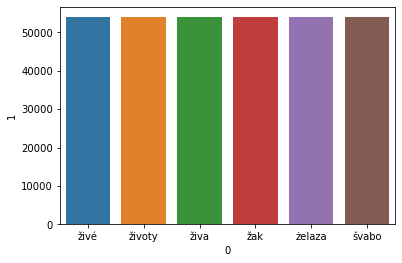

In [620]:
sns.barplot(x=k_.iloc[0:6,0],y=k_.iloc[0:6,1],)

In [627]:
artworks_df.loc[:,'Medium':]

,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,...,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),date_column
0,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2,http://www.moma.org/collection/works/2,...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN,NaN
1,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,Architecture,Architecture & Design,1995-01-17,Y,3,http://www.moma.org/collection/works/3,...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN,NaN
2,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,1.1997,Architecture,Architecture & Design,1997-01-15,Y,4,http://www.moma.org/collection/works/4,...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN,1903-03-01
3,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,2.1995,Architecture,Architecture & Design,1995-01-17,Y,5,http://www.moma.org/collection/works/5,...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN,NaN
4,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,2.1997,Architecture,Architecture & Design,1997-01-15,Y,6,http://www.moma.org/collection/works/6,...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN,1903-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140804,Page from a spiral-bound sketchbook with penci...,"12 1/8 × 8 7/8"" (30.8 × 22.5 cm)",Gift of Jack Shear,346.2020.30,Drawing,Drawings & Prints,2020-12-09,N,440436,NaN,...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,NaN
140805,Page from a spiral-bound sketchbook with penci...,"12 1/8 × 8 7/8"" (30.8 × 22.5 cm)",Gift of Jack Shear,346.2020.31,Drawing,Drawings & Prints,2020-12-09,N,440437,NaN,...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,NaN
140806,Page from a spiral-bound sketchbook with penci...,"12 1/8 × 8 7/8"" (30.8 × 22.5 cm)",Gift of Jack Shear,346.2020.32,Drawing,Drawings & Prints,2020-12-09,N,440438,NaN,...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,NaN
140807,"Spiral-bound sketchbook with pencil, ballpoint...","12 1/8 × 8 7/8"" (30.8 × 22.5 cm)",Gift of Jack Shear,346.2020.1,Drawing,Drawings & Prints,2020-12-09,N,440439,NaN,...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,NaN


In [629]:
artworks_.isna().sum()

Title                     39
Artist                  1216
ConstituentID           1216
ArtistBio               5825
Nationality             1216
BeginDate               1216
EndDate                 1216
Gender                  1216
Date                       0
Medium                  9631
Dimensions              9252
CreditLine              1863
AccessionNumber            0
Classification             1
Department                 0
DateAcquired            6682
Cataloged                  0
ObjectID                   0
URL                    46692
ThumbnailURL           57499
Circumference (cm)    140838
Depth (cm)            124793
Diameter (cm)         139384
Height (cm)            16981
Length (cm)           140106
Weight (kg)           140561
Width (cm)             17902
Seat Height (cm)      140848
Duration (sec.)       138906
date_column           112338
dtype: int64

In [628]:
artworks_df.describe()

,ObjectID,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
count,140809.000000,10.000000,16024.000000,1464.000000,123828.000000,742.000000,287.000000,122907.000000,0.0,1.942000e+03
mean,104356.310172,44.868020,14.436634,23.226111,37.364117,89.687579,1299.039319,37.828670,NaN,6.097952e+03
std,94714.338642,28.631604,51.581010,44.902258,49.325163,329.428165,12079.491475,66.973742,NaN,1.437000e+05
min,2.000000,9.900000,0.000000,0.635000,0.000000,0.000000,0.090000,0.000000,NaN,0.000000e+00
25%,37402.000000,23.500000,0.000000,7.778800,17.900000,17.100000,5.896800,17.415000,NaN,1.200000e+02
50%,75382.000000,36.000000,0.000000,13.652500,27.700000,26.700000,20.865500,25.400000,NaN,4.200000e+02
75%,146720.000000,71.125000,6.900000,25.000000,43.712897,79.700000,80.967100,44.000000,NaN,1.500000e+03
max,440440.000000,83.800000,1808.483617,914.400000,9140.000000,8321.056600,185067.585957,9144.000000,NaN,6.283065e+06


In [549]:
artworks['Title']

0         Ferdinandsbrücke Project, Vienna, Austria (Ele...
1         City of Music, National Superior Conservatory ...
2         Villa near Vienna Project, Outside Vienna, Aus...
3         The Manhattan Transcripts Project, New York, N...
4         Villa, project, outside Vienna, Austria, Exter...
                                ...                        
140843              Page from Sketchbook #24, New York City
140844              Page from Sketchbook #24, New York City
140845              Page from Sketchbook #24, New York City
140846         Front cover of Sketchbook #24, New York City
140847    Front cover (verso) of Sketchbook #24, New Yor...
Name: Title, Length: 140848, dtype: object

In [632]:
artworks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140809 entries, 0 to 140808
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               140809 non-null  object 
 1   Artist              139618 non-null  object 
 2   ConstituentID       139618 non-null  object 
 3   ArtistBio           135009 non-null  object 
 4   Nationality         139618 non-null  object 
 5   BeginDate           139618 non-null  object 
 6   EndDate             139618 non-null  object 
 7   Gender              139618 non-null  object 
 8   Date                140809 non-null  object 
 9   Medium              131199 non-null  object 
 10  Dimensions          131583 non-null  object 
 11  CreditLine          138946 non-null  object 
 12  AccessionNumber     140809 non-null  object 
 13  Classification      140808 non-null  object 
 14  Department          140809 non-null  object 
 15  DateAcquired        134127 non-nul

### outlier analysis 

In [633]:
continuous_cols = [col for col in artworks_df.select_dtypes('float64').columns]
continuous_cols

['Circumference (cm)',
 'Depth (cm)',
 'Diameter (cm)',
 'Height (cm)',
 'Length (cm)',
 'Weight (kg)',
 'Width (cm)',
 'Seat Height (cm)',
 'Duration (sec.)']

C:\Users\computer world\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\computer world\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\computer world\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

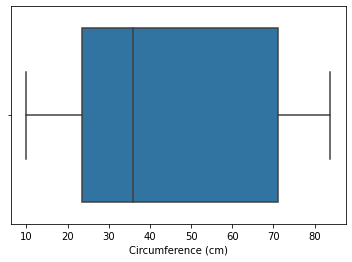

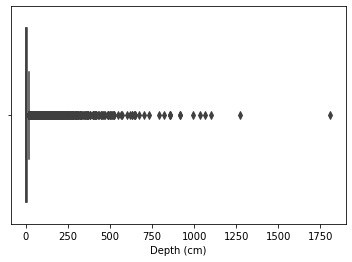

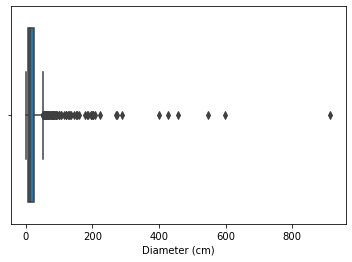

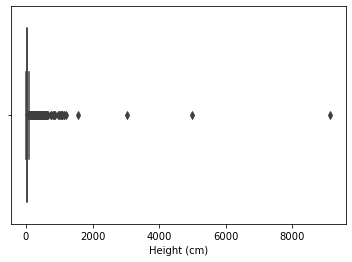

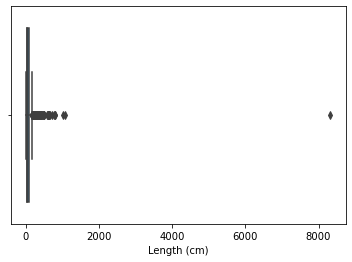

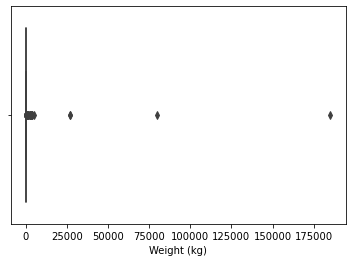

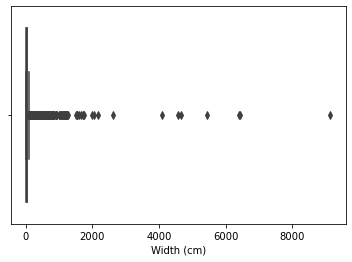

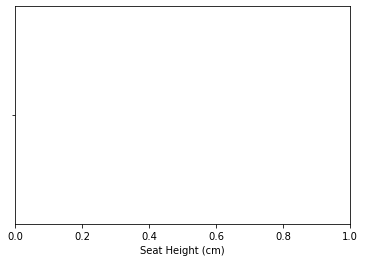

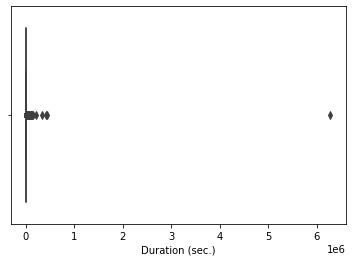

In [635]:
for col in continuous_cols:
    plt.figure()
    sns.boxplot(artworks_df[col])

In [657]:
artworks_df['Artist'].unique()

array(['Otto Wagner', 'Christian de Portzamparc', 'Emil Hoppe', ...,
       'Mohammed Sami', 'Lauren Halsey', 'Abdoulaye Konaté'], dtype=object)

<AxesSubplot:>

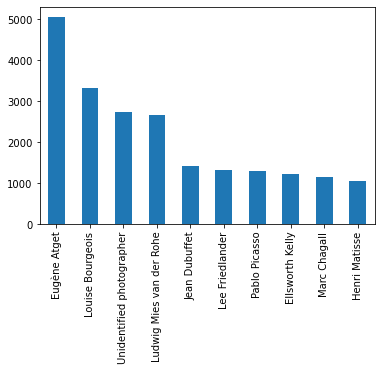

In [687]:
artworks_df['Artist'].value_counts()[:10].plot(kind='bar')

### TimeSeries Analysis 

In [636]:
artworks_datetime = artworks_df.drop(index=artworks_df[artworks_df['DateAcquired'].isna()].index)
artworks_datetime

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),date_column
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN,1903-03-01
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN,1903-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140804,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954-55,Page from a spiral-bound sketchbook with penci...,...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,NaN
140805,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954-55,Page from a spiral-bound sketchbook with penci...,...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,NaN
140806,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954-55,Page from a spiral-bound sketchbook with penci...,...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,NaN
140807,"Front cover of Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954-55,"Spiral-bound sketchbook with pencil, ballpoint...",...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,NaN


In [637]:
artworks_datetime['DateAcquired'] = pd.to_datetime(artworks_datetime['DateAcquired'])

In [638]:
artworks_datetime.set_index('DateAcquired',inplace=True)

artworks_datetime

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),date_column
DateAcquired,,,,,,,,,,,,,,,,,,,,,
1996-04-09,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN,NaN
1995-01-17,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN,NaN
1997-01-15,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN,1903-03-01
1995-01-17,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN,NaN
1997-01-15,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN,1903-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-09,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954-55,Page from a spiral-bound sketchbook with penci...,...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,NaN
2020-12-09,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954-55,Page from a spiral-bound sketchbook with penci...,...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,NaN
2020-12-09,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954-55,Page from a spiral-bound sketchbook with penci...,...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,NaN


In [666]:
artworks_df['DateAcquired'].value_counts()

1964-10-06    11520
2008-10-08     5388
1968-03-06     4992
2005-05-10     2605
2001-01-24     2214
              ...  
1994-08-05        1
1957-10-19        1
2001-03-21        1
1989-01-15        1
1948-01-01        1
Name: DateAcquired, Length: 1729, dtype: int64

In [669]:
pd.Series(artworks_df['DateAcquired'].value_counts())

1964-10-06    11520
2008-10-08     5388
1968-03-06     4992
2005-05-10     2605
2001-01-24     2214
              ...  
1994-08-05        1
1957-10-19        1
2001-03-21        1
1989-01-15        1
1948-01-01        1
Name: DateAcquired, Length: 1729, dtype: int64

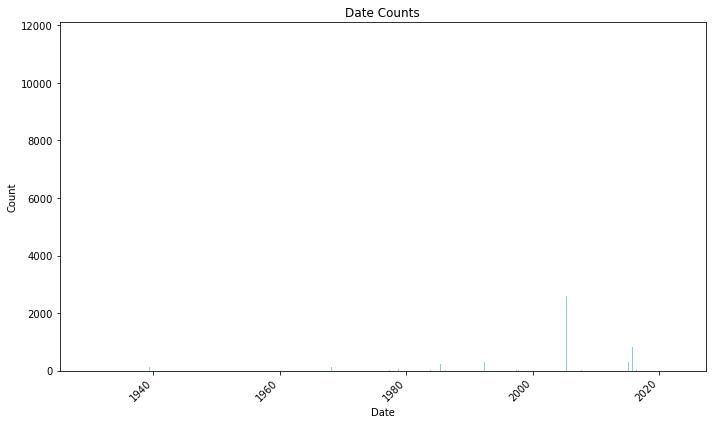

In [670]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is a pandas Series obtained from value_counts
data = pd.Series(artworks_df['DateAcquired'].value_counts())


# Convert the index to datetime format for proper plotting
data.index = pd.to_datetime(data.index)

# Sort the data by date
data = data.sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(data.index, data.values, color='skyblue')
plt.title('Date Counts')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [679]:
artworks_df['DateAcquired'].value_counts()

1964-10-06    11520
2008-10-08     5388
1968-03-06     4992
2005-05-10     2605
2001-01-24     2214
              ...  
1994-08-05        1
1957-10-19        1
2001-03-21        1
1989-01-15        1
1948-01-01        1
Name: DateAcquired, Length: 1729, dtype: int64

[]

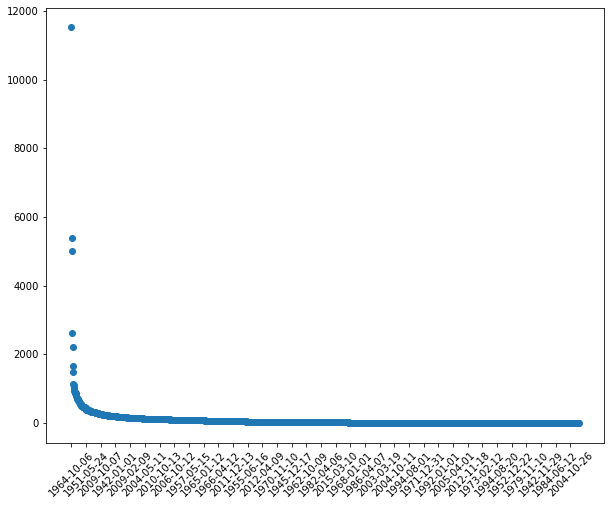

In [689]:
counts = artworks_df['DateAcquired'].value_counts()
plt.figure(figsize=(10, 8))
plt.scatter(counts.index, counts)
plt.xticks(counts.index[::50], rotation=45)
plt.plot()

[]

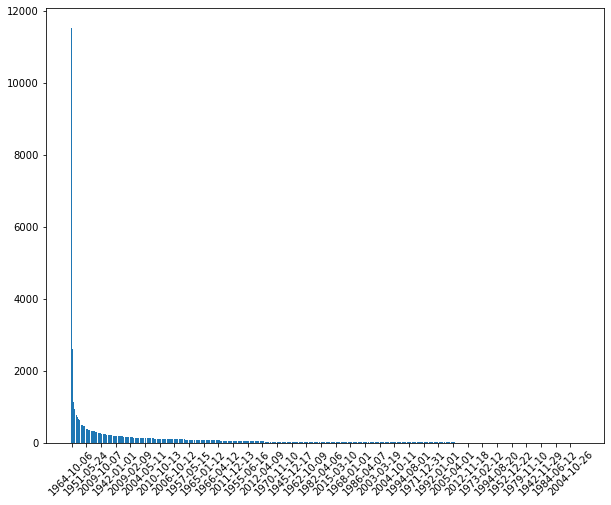

In [681]:
counts = artworks_df['DateAcquired'].value_counts()
plt.figure(figsize=(10, 8))
plt.bar(counts.index, counts)
plt.xticks(counts.index[::50], rotation=45)
plt.plot()

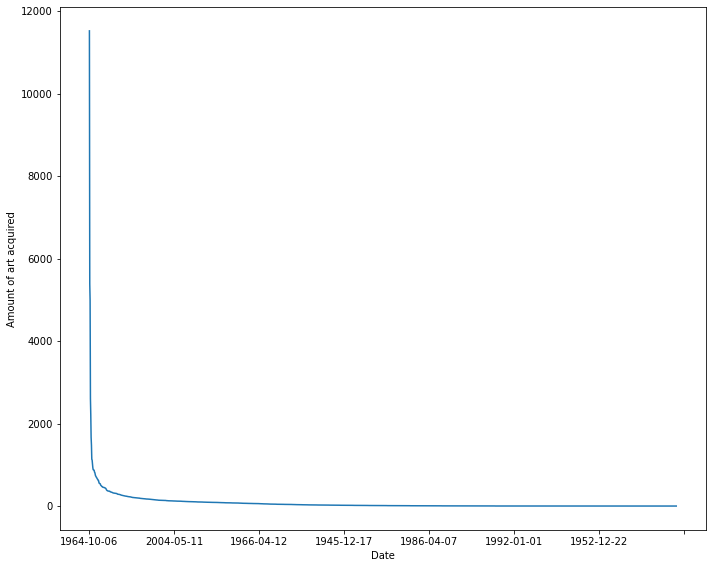

In [663]:
artworks_df['DateAcquired'].value_counts().plot(figsize=(10,8))
plt.ylabel("Amount of art acquired")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

In [639]:
artworks_datetime['Title'].value_counts()

Untitled                                                                                                         8414
Poster of the French National Railroad                                                                            375
Untitled from Favorite Objects                                                                                    264
Panel from Let's Take Back Our Space: 'Female' and 'Male' Body Language as a Result of Patriarchal Structures     213
Sleepers (Les Dormeurs)                                                                                           199
                                                                                                                 ... 
Jour (Day)                                                                                                          1
Construction bleu-rouge-noir                                                                                        1
Black-White-Silver No. 11                               